In [1]:
import pandas as pd

In [8]:
sales = pd.read_csv('train.csv')

In [9]:
features = pd.read_csv('features.csv')

In [10]:
stores = pd.read_csv("stores.csv")

In [11]:
print(sales.shape)

(421570, 5)


In [12]:
print(features.shape)

(8190, 12)


In [13]:
print(stores.shape)

(45, 3)


In [14]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [15]:
sales.columns = sales.columns.str.strip().str.lower()
features.columns = features.columns.str.strip().str.lower()
stores.columns = stores.columns.str.strip().str.lower()

sales.head()

,store,dept,date,weekly_sales,isholiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [18]:
sales["date"] = pd.to_datetime(sales["date"])
features["date"] = pd.to_datetime(features["date"])

print(sales.dtypes)

store                    int64
dept                     int64
date            datetime64[ns]
weekly_sales           float64
isholiday                 bool
dtype: object


In [19]:
def null_report(df):
    return df.isna().mean().sort_values(ascending=False).head(10)

print("Sales nulls:")
print(null_report(sales))

print("\nFeatures nulls:")
print(null_report(features))

print("\nStores nulls:")
print(null_report(stores))


Sales nulls:
store           0.0
dept            0.0
date            0.0
weekly_sales    0.0
isholiday       0.0
dtype: float64

Features nulls:
markdown2       0.643346
markdown4       0.577045
markdown3       0.558852
markdown1       0.507692
markdown5       0.505495
cpi             0.071429
unemployment    0.071429
store           0.000000
fuel_price      0.000000
temperature     0.000000
dtype: float64

Stores nulls:
store    0.0
type     0.0
size     0.0
dtype: float64


In [20]:
df = (
    sales
    .merge(stores, on="store", how="left")
    .merge(features, on=["store", "date"], how="left")
)

print(df.shape)
df.head()

(421570, 17)


,store,dept,date,weekly_sales,isholiday_x,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [21]:
df["year"] = df["date"].dt.year
df["week"] = df["date"].dt.isocalendar().week.astype(int)

df.describe(include="all").T.head(10)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
store,421570.0,NaN,NaN,NaN,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
dept,421570.0,NaN,NaN,NaN,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
date,421570,NaN,NaN,NaN,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
weekly_sales,421570.0,NaN,NaN,NaN,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
isholiday_x,421570,2,False,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,421570,3,A,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,421570.0,NaN,NaN,NaN,136727.915739,34875.0,93638.0,140167.0,202505.0,219622.0,60980.583328
temperature,421570.0,NaN,NaN,NaN,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
fuel_price,421570.0,NaN,NaN,NaN,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
markdown1,150681.0,NaN,NaN,NaN,7246.420196,0.27,2240.27,5347.45,9210.9,88646.76,8291.221345


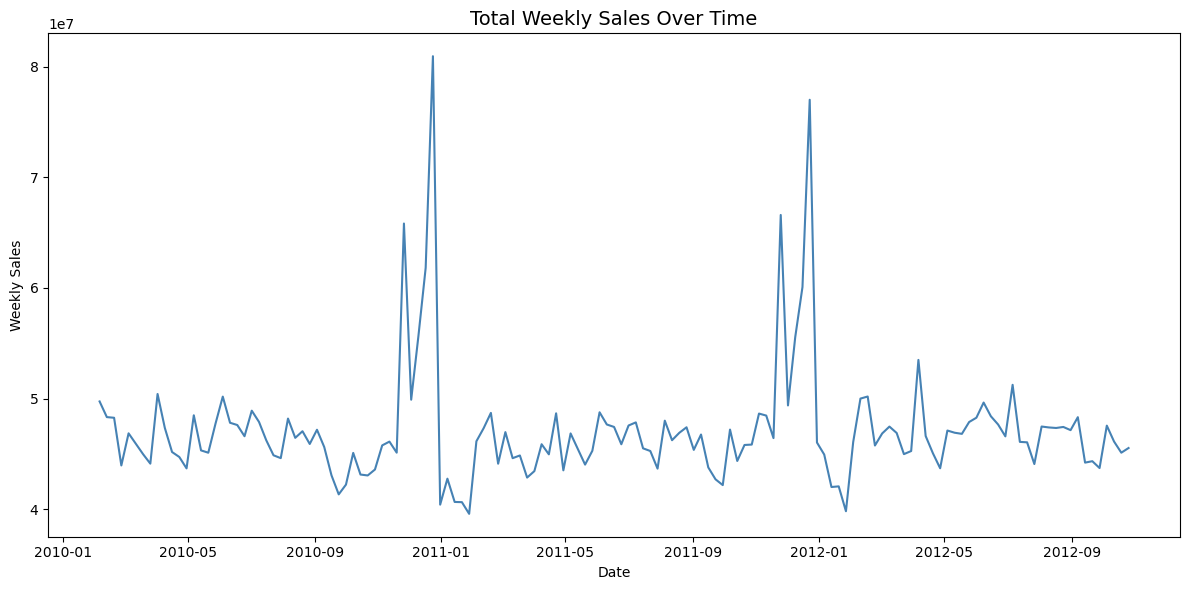

In [22]:
import matplotlib.pyplot as plt

weekly = df.groupby("date", as_index=False)["weekly_sales"].sum()

plt.figure(figsize=(12,6))
plt.plot(weekly["date"], weekly["weekly_sales"], color="steelblue")
plt.title("Total Weekly Sales Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

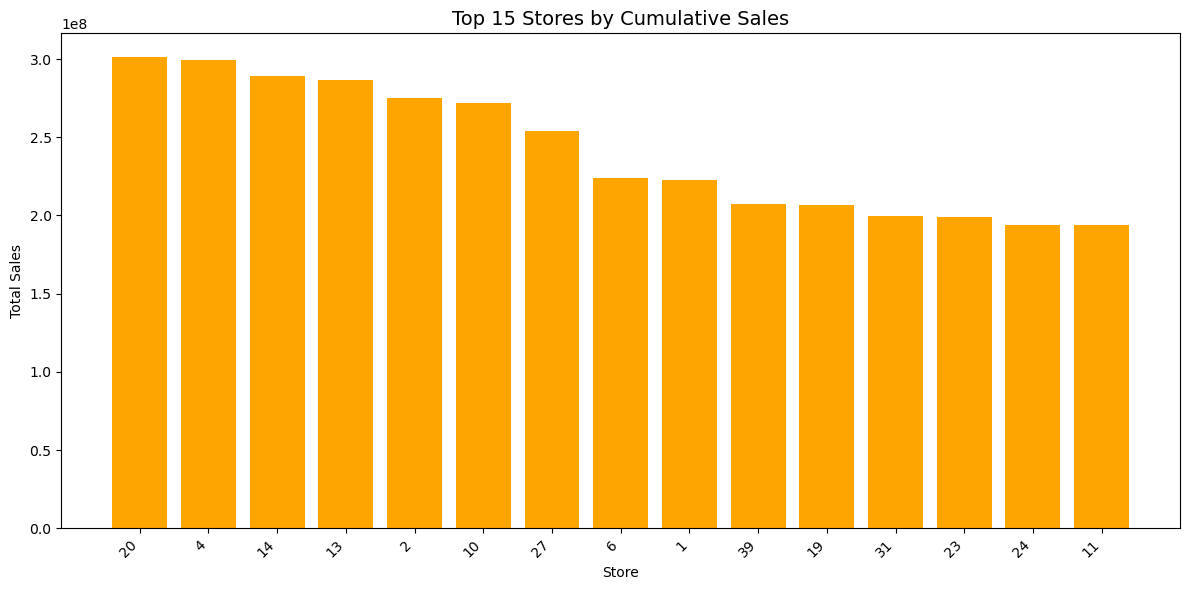

In [23]:
store_rev = (
    df.groupby("store", as_index=False)["weekly_sales"]
      .sum()
      .sort_values("weekly_sales", ascending=False)
      .head(15)
)

plt.figure(figsize=(12,6))
plt.bar(store_rev["store"].astype(str), store_rev["weekly_sales"], color="orange")
plt.title("Top 15 Stores by Cumulative Sales", fontsize=14)
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
weekly.to_csv(".derived_weekly_sales.csv", index=False)
store_rev.to_csv("../sql/derived_store_revenue_top15.csv", index=False)